In [128]:
%matplotlib inline

In [138]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
from matplotlib.collections import LineCollection
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.style as stl
stl.use('dark_background')

In [130]:
ff1.Cache.enable_cache('/Users/javi/Library/Caches')

In [131]:
session = ff1.get_session(2022, 2, "Q")
session.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v2.2.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['11', '16', '55', '1', '31', '63', '14', '77', '10', '20', '4', '3', '24', '47', '18', '44', '23', '27', '6', '22']


In [132]:
laps_charles = session.laps.pick_driver('LEC')
laps_checo = session.laps.pick_driver('PER')
fastest_charles = laps_charles.pick_fastest()
fastest_checo = laps_checo.pick_fastest()
telemetry_charles = fastest_charles.get_telemetry().add_distance()
telemetry_checo = fastest_checo.get_telemetry().add_distance()
ferrari = fastest_charles['Team']
rb = fastest_checo['Team']

In [133]:
x_charles = np.array(telemetry_charles['X'].values)
y_charles = np.array(telemetry_charles['Y'].values)
gear_charles = telemetry_charles['nGear'].to_numpy().astype(float)
points_charles = np.array([x_charles, y_charles]).T.reshape(-1, 1, 2)
segments_charles = np.concatenate([points_charles[:-1], points_charles[1:]], axis=1)


x_checo = np.array(telemetry_checo['X'].values)
y_checo = np.array(telemetry_checo['Y'].values)
gear_checo = telemetry_checo['nGear'].to_numpy().astype(float)
points_checo = np.array([x_checo, y_checo]).T.reshape(-1, 1, 2)
segments_checo = np.concatenate([points_checo[:-1], points_checo[1:]], axis=1)


In [164]:
cmap_charles = cm.get_cmap('Paired')
lc_comp_charles = LineCollection(segments_charles, norm=plt.Normalize(1, cmap_charles.N+1), cmap=cmap_charles)
lc_comp_charles.set_array(gear_charles)
lc_comp_charles.set_linewidth(4)

cmap_checo = cm.get_cmap('Paired')
lc_comp_checo = LineCollection(segments_checo, norm=plt.Normalize(1, cmap_checo.N+1), cmap=cmap_checo)
lc_comp_checo.set_array(gear_checo)
lc_comp_checo.set_linewidth(4)

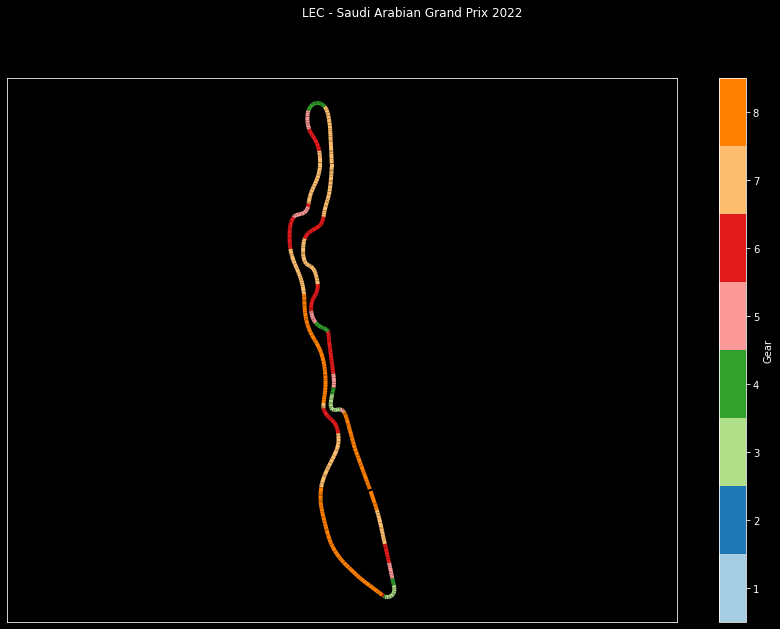

In [165]:
plt.figure(figsize=(15,10))
plt.gca().add_collection(lc_comp_charles)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(f"LEC - {session.event['EventName']} {session.event.year}")
cbar_charles = plt.colorbar(mappable=lc_comp_charles, label="Gear", boundaries=np.arange(1, 10))
cbar_charles.set_ticks(np.arange(1.5, 9.5))
cbar_charles.set_ticklabels(np.arange(1, 9))


plt.show()


/var/folders/0j/1rhcqn_173b1sxlypl_4f72w0000gn/T/ipykernel_82560/704522259.py:7: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar_charles = plt.colorbar(mappable=lc_comp_charles, label="Gear", boundaries=np.arange(1, 10))


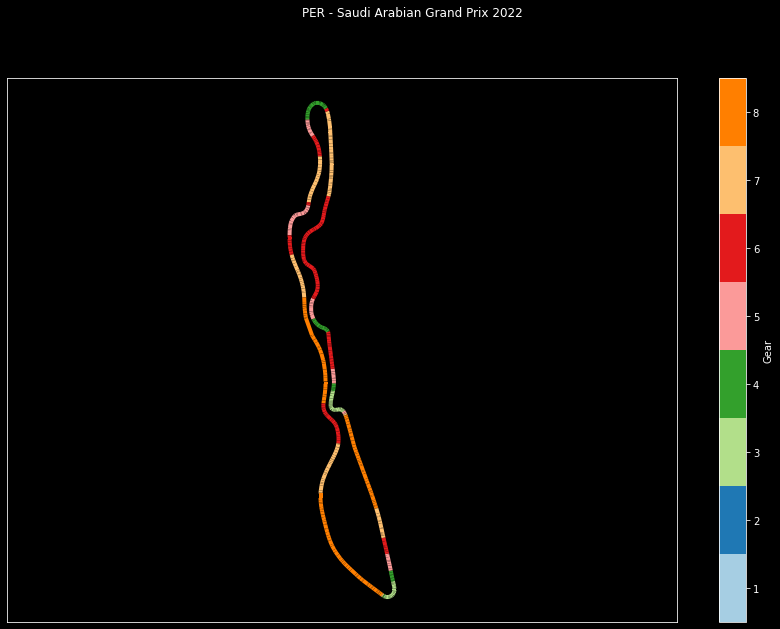

In [161]:
plt.figure(figsize=(15,10))
plt.gca().add_collection(lc_comp_checo)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(f"PER - {session.event['EventName']} {session.event.year}")
cbar_charles = plt.colorbar(mappable=lc_comp_charles, label="Gear", boundaries=np.arange(1, 10))
cbar_charles.set_ticks(np.arange(1.5, 9.5))
cbar_charles.set_ticklabels(np.arange(1, 9))


plt.show()


In [139]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_charles, fastest_checo)

In [145]:
plot_size = [15, 15]
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {'LEC'} VS {'PER'}"
plot_ratios = [3, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"

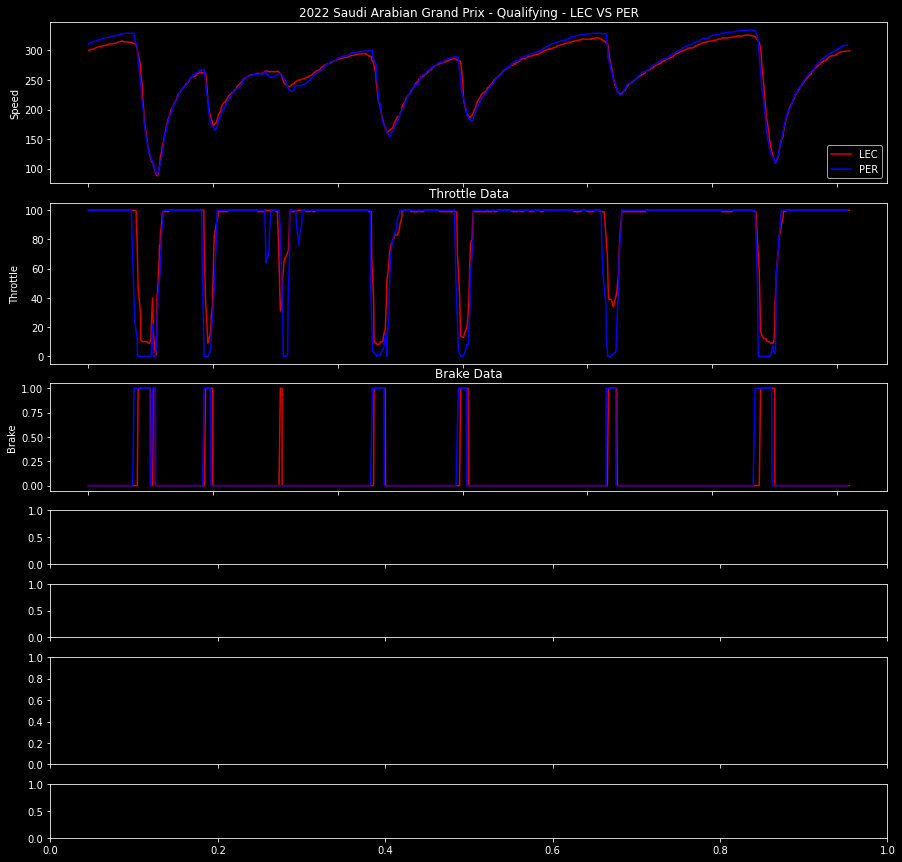

In [147]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax[0].title.set_text(plot_title)


# # Delta line
# ax[0].plot(ref_tel['Distance'], delta_time)
# ax[0].axhline(0)
# ax[0].set(ylabel=f"Gap to {'PER'} (s)")

# Speed trace
ax[0].plot(telemetry_charles['Distance'], telemetry_charles['Speed'], label='LEC', color=ff1.plotting.team_color(ferrari))
ax[0].plot(telemetry_checo['Distance'], telemetry_checo['Speed'], label='PER', color=ff1.plotting.team_color(rb))
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

# Throttle trace
ax[1].title.set_text("Throttle Data")
ax[1].plot(telemetry_charles['Distance'], telemetry_charles['Throttle'], label='LEC', color=ff1.plotting.team_color(ferrari))
ax[1].plot(telemetry_checo['Distance'], telemetry_checo['Throttle'], label='PER', color=ff1.plotting.team_color(rb))
ax[1].set(ylabel='Throttle')

# Brake trace
ax[2].title.set_text("Brake Data")
ax[2].plot(telemetry_charles['Distance'], telemetry_charles['Brake'], label='LEC', color=ff1.plotting.team_color(ferrari))
ax[2].plot(telemetry_checo['Distance'], telemetry_checo['Brake'], label='PER', color=ff1.plotting.team_color(rb))
ax[2].set(ylabel='Brake')

# # Gear trace
# ax[4].plot(telemetry_charles['Distance'], telemetry_charles['nGear'], label='LEC', color=ff1.plotting.team_color(ferrari))
# ax[4].plot(telemetry_checo['Distance'], telemetry_checo['nGear'], label='PER', color=ff1.plotting.team_color(rb))
# ax[4].set(ylabel='Gear')

# # RPM trace
# ax[5].plot(telemetry_charles['Distance'], telemetry_charles['RPM'], label='LEC', color=ff1.plotting.team_color(ferrari))
# ax[5].plot(telemetry_checo['Distance'], telemetry_checo['RPM'], label='PER', color=ff1.plotting.team_color(rb))
# ax[5].set(ylabel='RPM')

# # DRS trace
# ax[6].plot(telemetry_charles['Distance'], telemetry_charles['DRS'], label='LEC', color=ff1.plotting.team_color(ferrari))
# ax[6].plot(telemetry_checo['Distance'], telemetry_checo['DRS'], label='PER', color=ff1.plotting.team_color(rb))
# ax[6].set(ylabel='DRS')
# ax[6].set(xlabel='Lap distance (meters)')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
plt.savefig(plot_filename, dpi=300)
plt.show()